<a href="https://colab.research.google.com/github/lazernata/Deep-Learning-Course-Exercises/blob/main/Unidad_3_Precio_vivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importación de librerías y datos

In [20]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
df = pd.read_excel("/content/viviendas_Madrid.xlsx", sheet_name="Datos_Históricos")

# 2. Análisis de datos Exploratorio + Preprocesamiento

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19310 entries, 0 to 21740
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       19310 non-null  int64  
 1   title                    19310 non-null  object 
 2   subtitle                 19310 non-null  object 
 3   sq_mt_built              19310 non-null  float64
 4   n_rooms                  19310 non-null  int64  
 5   n_bathrooms              19310 non-null  float64
 6   is_exact_address_hidden  19310 non-null  bool   
 7   is_floor_under           19310 non-null  float64
 8   neighborhood_id          19310 non-null  object 
 9   operation                19310 non-null  object 
 10  rent_price               19310 non-null  float64
 11  is_rent_price_known      19310 non-null  bool   
 12  buy_price                19310 non-null  int64  
 13  buy_price_by_area        19310 non-null  int64  
 14  is_buy_price_known       19

In [23]:
df.head(5)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trÃ¡mite,True,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0


## 2.1 Limpieza inicial

In [24]:
df.isnull().sum() # Cuántos valores nulos hay

,0
id,0
title,0
subtitle,0
sq_mt_built,126
sq_mt_useful,13514
n_rooms,0
n_bathrooms,16
n_floors,20305
sq_mt_allotment,20310
latitude,21742


In [25]:
df_var = df.isnull().sum()
porcentaje_eliminacion = 0.1 # Porcentaje de eliminación es igual a 10%
df_var = df_var[df_var < porcentaje_eliminacion*len(df)] # Nos quedamos con las variables que tienen menos de 10% (2174.2) de valores nulos
lista_variables_ok = df_var.index # Nos quedamos con los nombres de las variables de interés
df = df[lista_variables_ok] # Filtramos el df original y nos quedamos con las variables de interés
df.head(5)

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,neighborhood_id,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,energy_certificate,has_parking
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,2,1.0,False,0.0,Neighborhood 135: San CristÃ³bal (1308.89 â‚¬/...,sale,471.0,False,85000,1328,True,HouseType 1: Pisos,False,0.0,D,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,3,1.0,True,0.0,Neighborhood 132: Los Ãngeles (1796.68 â‚¬/m2...,sale,666.0,False,129900,1856,True,HouseType 1: Pisos,True,0.0,en trÃ¡mite,False
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,2,2.0,False,0.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,722.0,False,144247,1535,True,HouseType 1: Pisos,False,0.0,no indicado,False
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,2,1.0,True,1.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,583.0,False,109900,1717,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,2,2.0,True,0.0,Neighborhood 133: Los Rosales (1827.79 â‚¬/m2)...,sale,1094.0,False,260000,2407,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,True


In [26]:
df = df.dropna() # Eliminamos los valores nulos
df.isnull().sum() # Comprobamos si hay valores nulos

,0
id,0
title,0
subtitle,0
sq_mt_built,0
n_rooms,0
n_bathrooms,0
is_exact_address_hidden,0
is_floor_under,0
neighborhood_id,0
operation,0


In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19310.0,10751.771621,6272.883675,2.0,5347.25,10575.5,16243.75,21742.0
sq_mt_built,19310.0,144.126359,125.418617,16.0,71.00,101.0,161.00,999.0
n_rooms,19310.0,3.013361,1.388427,0.0,2.00,3.0,4.00,24.0
n_bathrooms,19310.0,2.039617,1.271573,1.0,1.00,2.0,2.00,14.0
is_floor_under,19310.0,0.118747,0.323499,0.0,0.00,0.0,0.00,1.0
rent_price,19310.0,1573.749995,931.244378,18.0,913.00,1368.0,2073.50,12584.0
buy_price,19310.0,632592.345106,720196.584637,36000.0,200000.00,380000.0,750000.00,8800000.0
buy_price_by_area,19310.0,4061.935008,1917.230783,447.0,2586.00,3783.5,5047.00,18889.0
is_new_development,19310.0,0.060124,0.237723,0.0,0.00,0.0,0.00,1.0


## 2.2 Visualización de datos

### 2.2.1 Gráficos básicos

<Figure size 1200x800 with 0 Axes>

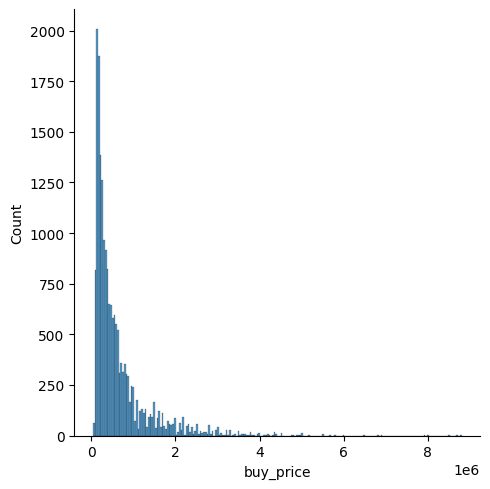

In [28]:
plt.figure(figsize=(12,8))
sns.displot(df['buy_price']) # Plantearse descartar outliers para facilitar el entrenamiento de la red neuronal

<Axes: xlabel='n_rooms', ylabel='count'>

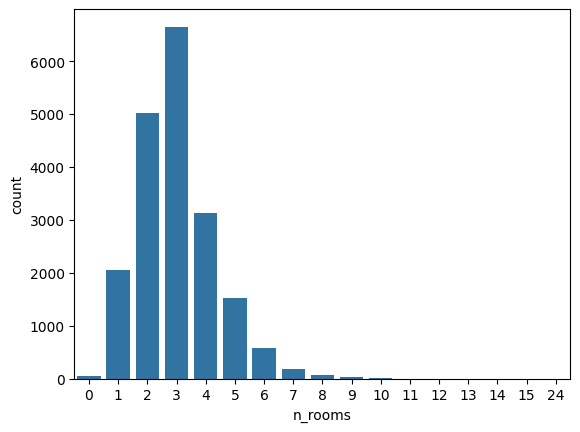

In [29]:
sns.countplot(data = df, x = 'n_rooms')

In [30]:
df_num = df.select_dtypes(include=['float64', 'int64', 'bool'])
df_num.corr()['buy_price'].sort_values() # Verificar qué variables tienen mayor correlación con la de salida

,buy_price
id,-0.195828
is_floor_under,-0.149768
is_new_development,-0.013903
is_renewal_needed,0.052132
is_exact_address_hidden,0.167964
has_parking,0.315350
n_rooms,0.578291
buy_price_by_area,0.581698
n_bathrooms,0.753692
sq_mt_built,0.831700


<Axes: xlabel='buy_price', ylabel='sq_mt_built'>

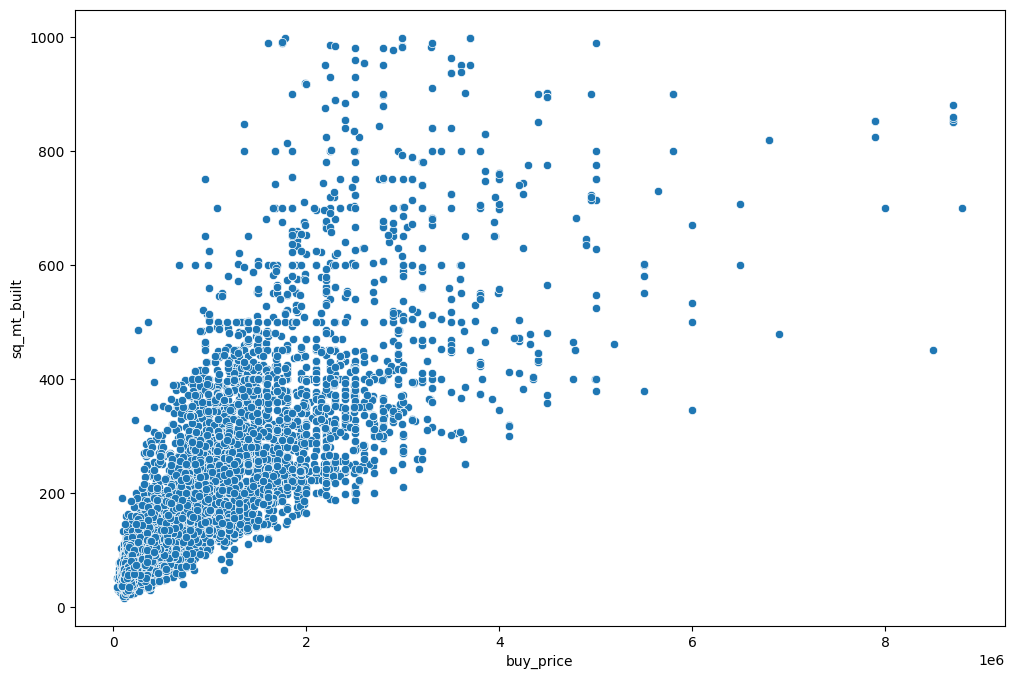

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='buy_price', y='sq_mt_built', data = df) # Visualizar las variables altamente correladas

<Axes: xlabel='buy_price', ylabel='rent_price'>

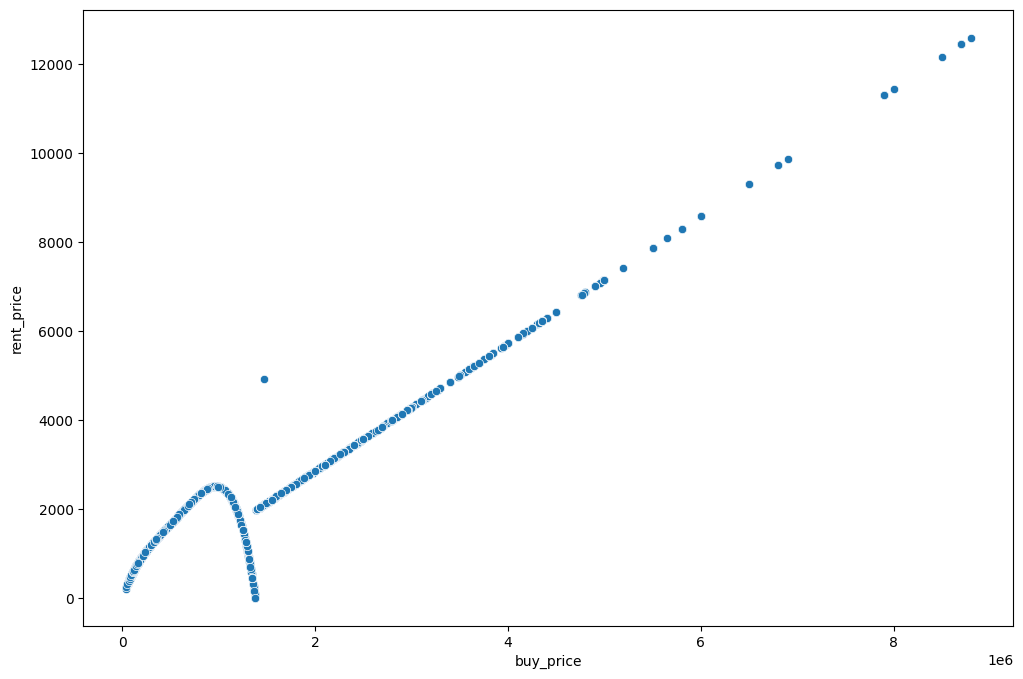

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='buy_price', y='rent_price', data = df) # Visualizar las variables altamente correladas

<Axes: xlabel='n_bathrooms', ylabel='buy_price'>

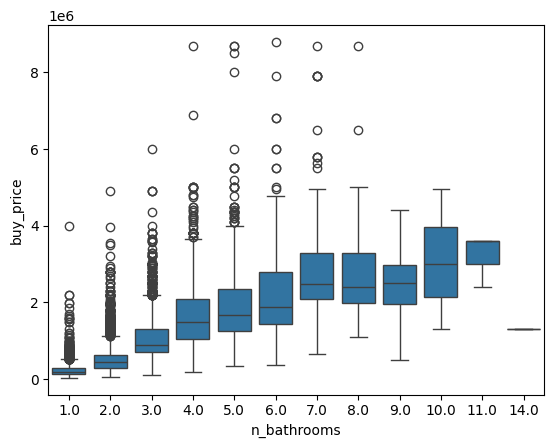

In [33]:
sns.boxplot(x='n_bathrooms', y = 'buy_price', data = df)

### 2.2.2 Ejemplo con gráficos geográficos

In [34]:
df1 = pd.read_csv("/content/kc_house_data.csv")

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: xlabel='price', ylabel='long'>

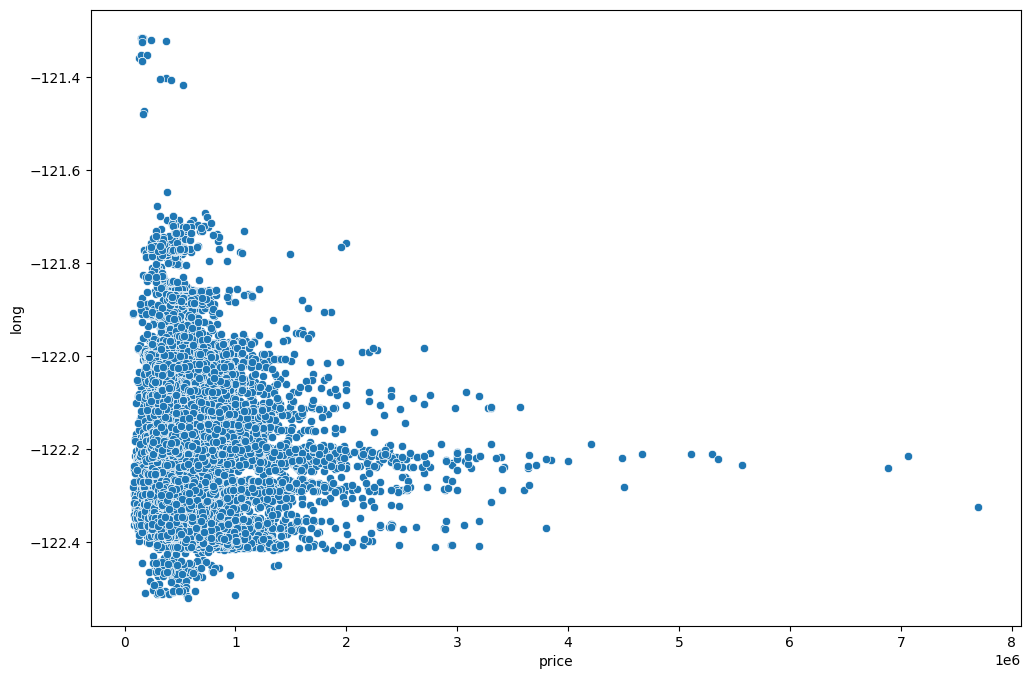

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y = 'long', data =df1)

<Axes: xlabel='price', ylabel='lat'>

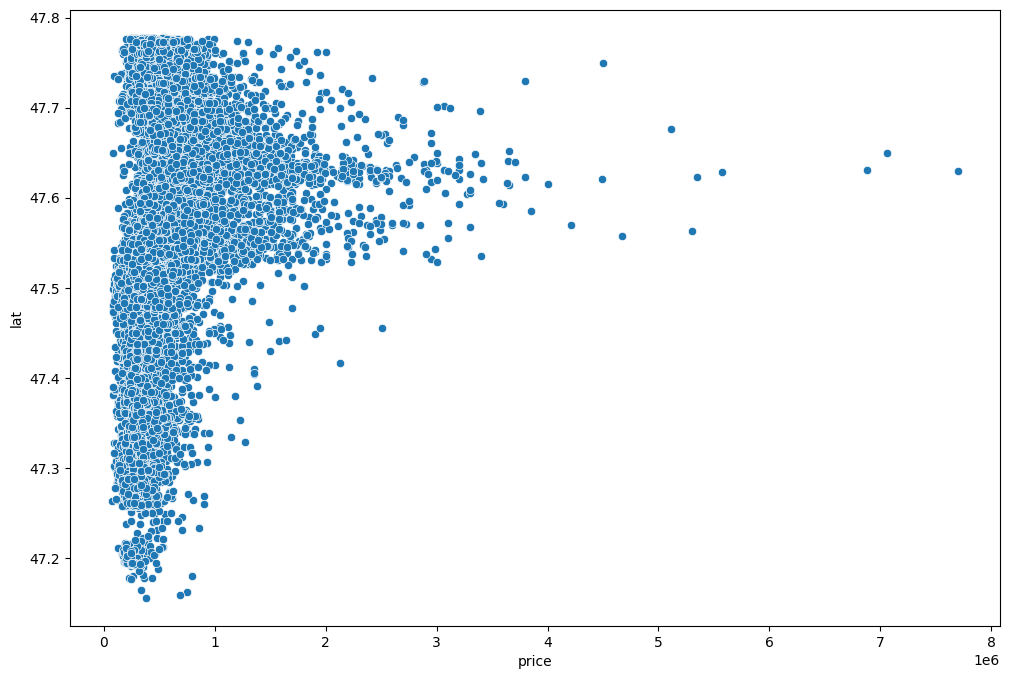

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y = 'lat', data =df1)

<Axes: xlabel='price', ylabel='long'>

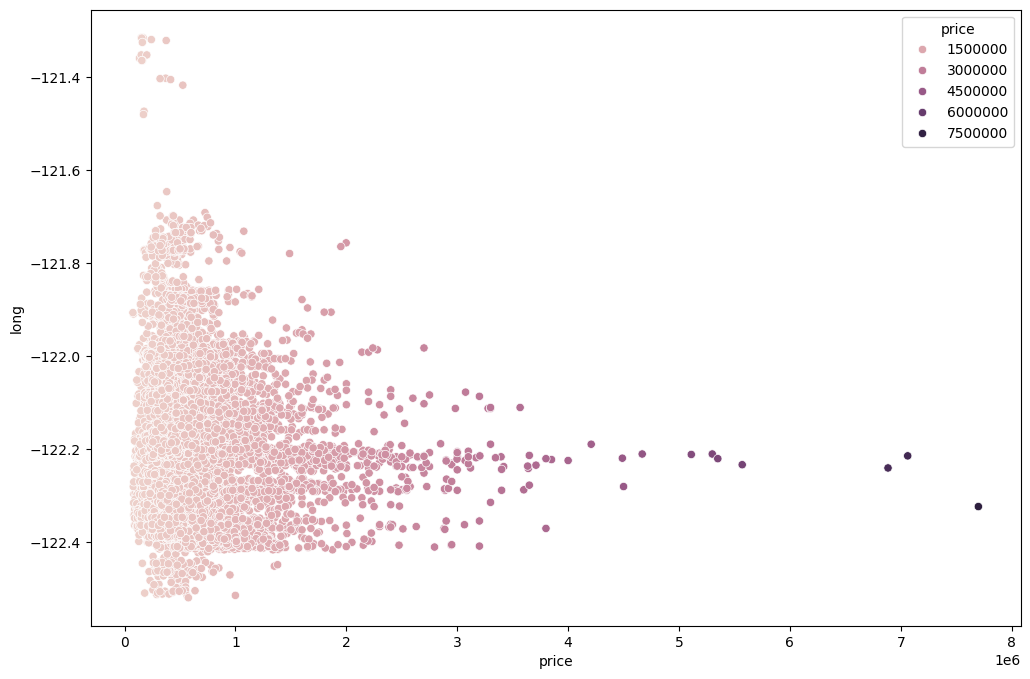

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df1, hue='price') # Representación con poco rango dinámico de colores debido a los outliers

In [39]:
len(df1)*(0.01) # número de muestras que sería nuestro 1% de datos

216.13

In [40]:
non_top_1_perc = df1.sort_values('price', ascending = False).iloc[216:] # quitamos el 1% de los valores outliers

<Axes: xlabel='long', ylabel='lat'>

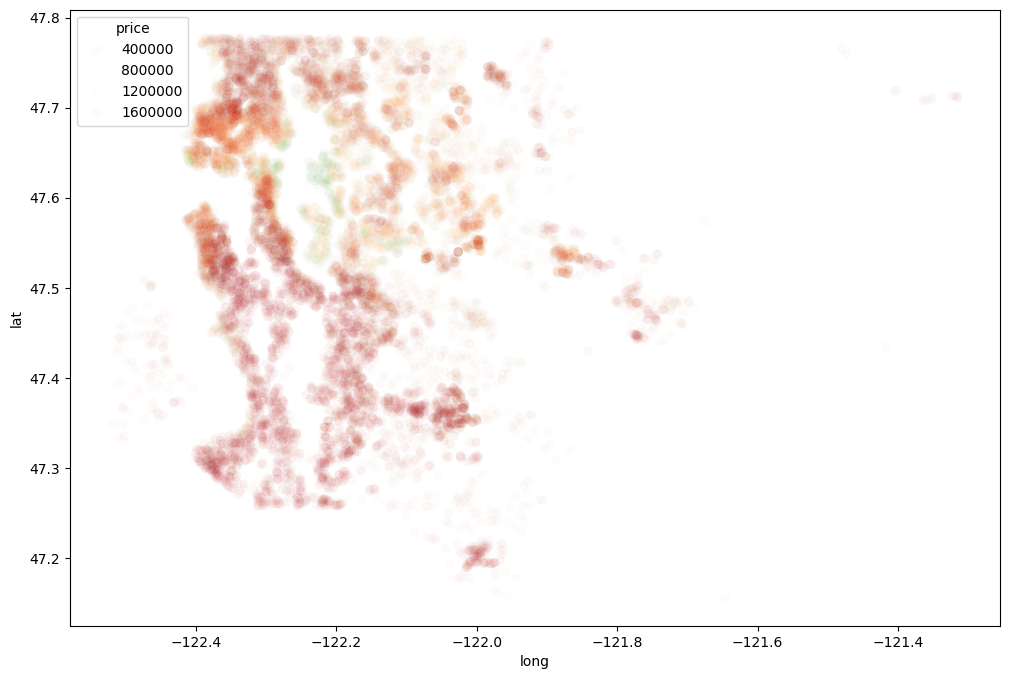

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price',
                palette = "RdYlGn", edgecolor = None, alpha = 0.02)

### 2.2.3 Otras variables

<Axes: xlabel='has_parking', ylabel='buy_price'>

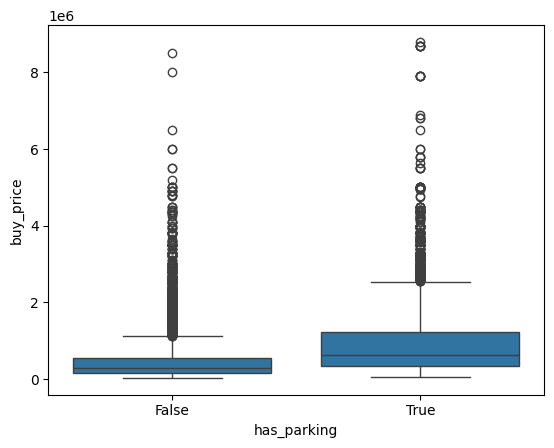

In [43]:
sns.boxplot(x='has_parking', y='buy_price', data=df)

## 2.4 Limpieza final

In [44]:
df_num = df.select_dtypes(include=['float64', 'int64', 'bool'])
df_num.corr()['buy_price'].sort_values() # Descartar las variables con baja correlación

,buy_price
id,-0.195828
is_floor_under,-0.149768
is_new_development,-0.013903
is_renewal_needed,0.052132
is_exact_address_hidden,0.167964
has_parking,0.315350
n_rooms,0.578291
buy_price_by_area,0.581698
n_bathrooms,0.753692
sq_mt_built,0.831700


In [45]:
df = df.drop(['id','title','subtitle','is_exact_address_hidden','is_renewal_needed','neighborhood_id','operation','is_rent_price_known','is_buy_price_known','buy_price_by_area','is_buy_price_known','house_type_id','energy_certificate'],axis=1)

In [46]:
df.head()

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking
0,64.0,2,1.0,0.0,471.0,85000,0.0,False
1,70.0,3,1.0,0.0,666.0,129900,0.0,False
2,94.0,2,2.0,0.0,722.0,144247,0.0,False
3,64.0,2,1.0,1.0,583.0,109900,0.0,False
4,108.0,2,2.0,0.0,1094.0,260000,0.0,True


## 2.5 Limpieza de datos temporales

In [53]:
df1['date'] = pd.to_datetime(df1['date'])
df1['month'] = df1['date'].apply(lambda date:date.month)
df1['year'] = df1['date'].apply(lambda date:date.year)

<Axes: xlabel='year', ylabel='price'>

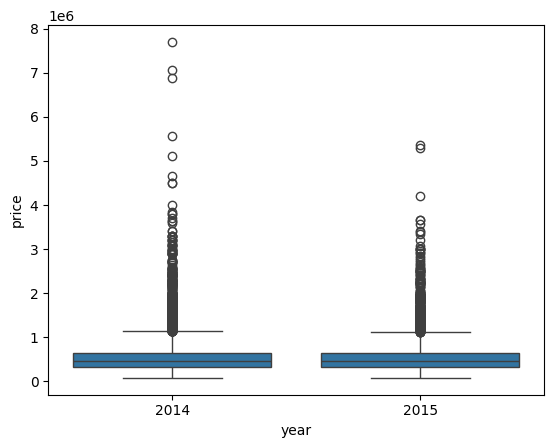

In [52]:
sns.boxplot(x='year',y='price',data=df1)

<Axes: xlabel='month', ylabel='price'>

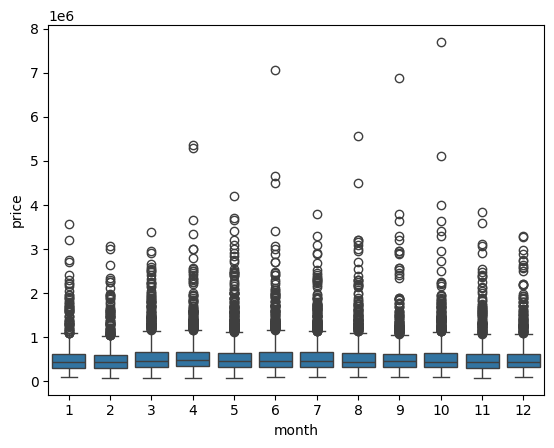

In [54]:
sns.boxplot(x='month',y='price',data=df1)

<Axes: xlabel='month'>

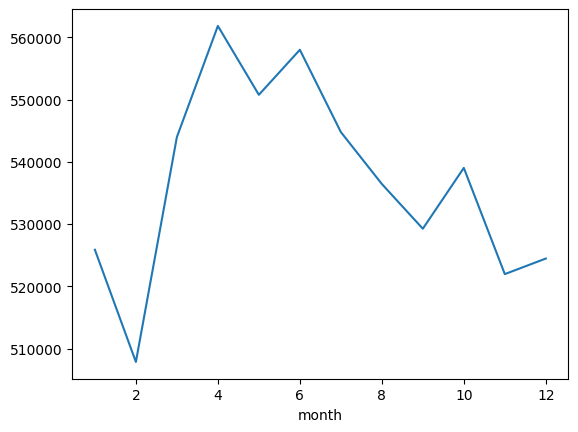

In [55]:
df1.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

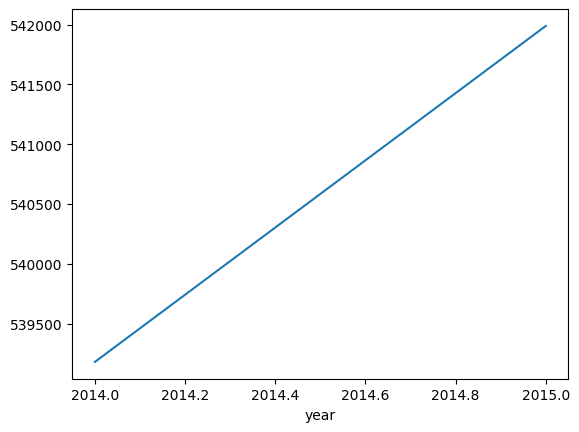

In [56]:
df1.groupby('year').mean()['price'].plot()

In [57]:
df1 = df1.drop('date',axis=1) # La fecha no será una variable útil para el modelo

In [58]:
df1['sqft_basement'].value_counts()

,count
sqft_basement,
0,13126
600,221
700,218
500,214
800,206
...,...
518,1
374,1
784,1


# 3. Train test split